# *Step 1: Exploratory Data Analysis (EDA)* #

## Section 1.1 : Load and isnpect the Dataset ##

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("airbnb.csv")
# Fix misnamed column
df.rename(columns={'toiles': 'toilets'}, inplace=True)

# Drop irrelevant columns
df.drop(columns=['Unnamed: 0', 'id', 'host_id', 'img_links'], inplace=True)

# Show the first few rows
df.head()

,name,rating,reviews,host_name,address,features,amenities,safety_rules,hourse_rules,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout
0,Perla bungalov,4.71,64,Mehmetcan,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,cottages sataplia,4.85,68,Giorgi,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,Sapanca Breathable Bungalow,5.0,13,Melih,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,Bungalov Ev 2,New,0,Arp Sapanca,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


## Section 1.2: Check Data Types and Missing Values ##

In [36]:
# Data types and nulls
print("\nData Types and Null Values Summary:\n")
print(df.info())

# Total missing values per column
print("\nMissing Values per Column:\n")
print(df.isnull().sum())


Data Types and Null Values Summary:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          12805 non-null  object
 1   rating        12805 non-null  object
 2   reviews       12805 non-null  object
 3   host_name     12797 non-null  object
 4   address       12805 non-null  object
 5   features      12805 non-null  object
 6   amenities     12805 non-null  object
 7   safety_rules  12805 non-null  object
 8   hourse_rules  12805 non-null  object
 9   price         12805 non-null  int64 
 10  country       12805 non-null  object
 11  bathrooms     12805 non-null  int64 
 12  beds          12805 non-null  int64 
 13  guests        12805 non-null  int64 
 14  toilets       12805 non-null  int64 
 15  bedrooms      12805 non-null  int64 
 16  studios       12805 non-null  int64 
 17  checkin       12005 non-null  object
 18  checkout

## Section 1.3: Convert Types and Handle Text-based Numerics ##

In [37]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')

## Section 1.4: Statistical Summary of Numerical Features ##

In [38]:
print("\nNumerical Feature Summary:\n")
print(df[['price', 'rating', 'reviews', 'bedrooms', 'bathrooms', 'guests', 'beds']].describe())


Numerical Feature Summary:

              price       rating       reviews      bedrooms     bathrooms  \
count  1.280500e+04  8567.000000  12804.000000  12805.000000  12805.000000   
mean   1.769780e+04     4.857475     36.064511      2.136041      1.874424   
std    4.569364e+04     0.140803     65.525542      2.359005      2.091399   
min    3.930000e+02     3.000000      0.000000      0.000000      0.000000   
25%    3.994000e+03     4.770000      1.000000      1.000000      1.000000   
50%    8.175000e+03     4.890000     10.000000      1.000000      1.000000   
75%    1.606200e+04     4.980000     42.000000      3.000000      2.000000   
max    1.907963e+06     5.000000    943.000000     50.000000     50.000000   

             guests          beds  
count  12805.000000  12805.000000  
mean       5.213745      3.316751  
std        3.808830      4.037791  
min        1.000000      0.000000  
25%        2.000000      1.000000  
50%        4.000000      2.000000  
75%        6.000

## Section 1.5: Visualize Distributions of Key Numerical Features ##

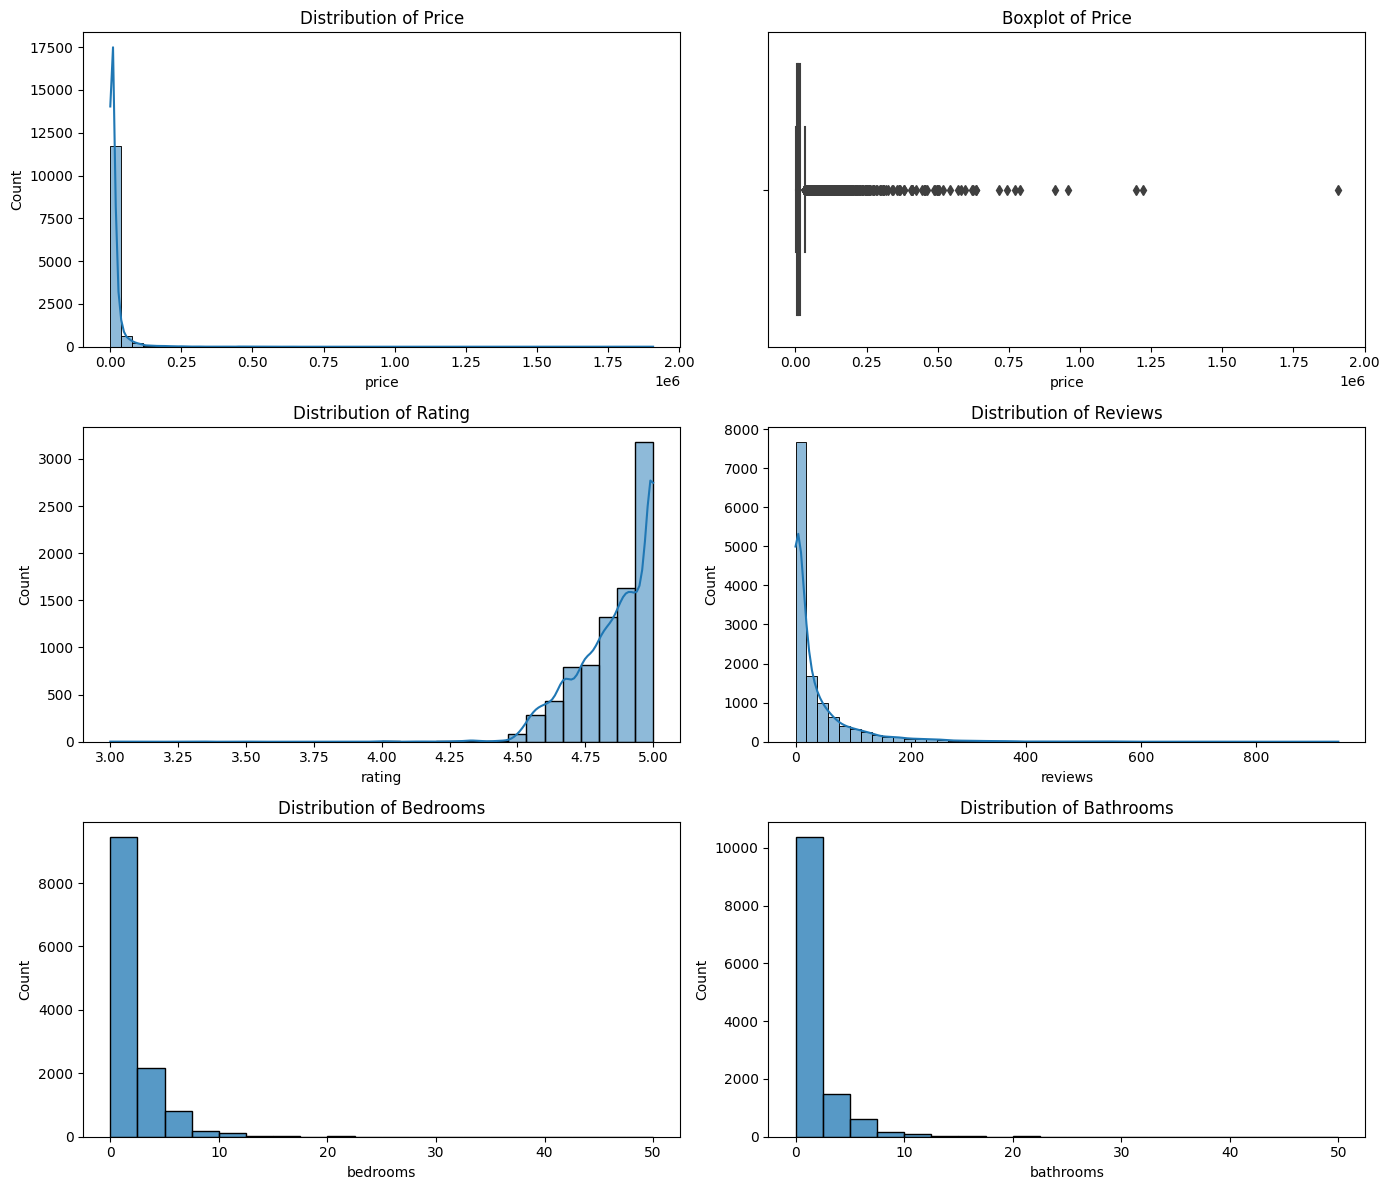

In [39]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
sns.histplot(df['price'], bins=50, kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution of Price')

sns.boxplot(x=df['price'], ax=axes[0,1])
axes[0,1].set_title('Boxplot of Price')

sns.histplot(df['rating'], bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title('Distribution of Rating')

sns.histplot(df['reviews'], bins=50, kde=True, ax=axes[1,1])
axes[1,1].set_title('Distribution of Reviews')

sns.histplot(df['bedrooms'], bins=20, kde=False, ax=axes[2,0])
axes[2,0].set_title('Distribution of Bedrooms')

sns.histplot(df['bathrooms'], bins=20, kde=False, ax=axes[2,1])
axes[2,1].set_title('Distribution of Bathrooms')

plt.tight_layout()
plt.show()

## Section 1.6: Correlation Matrix ##

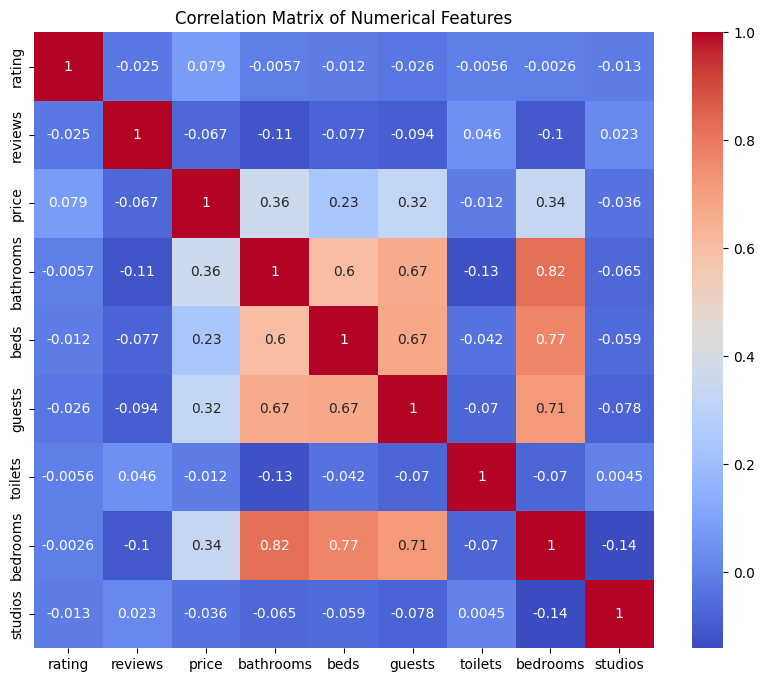

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## Section 1.7: Analyze Categorical Features ##

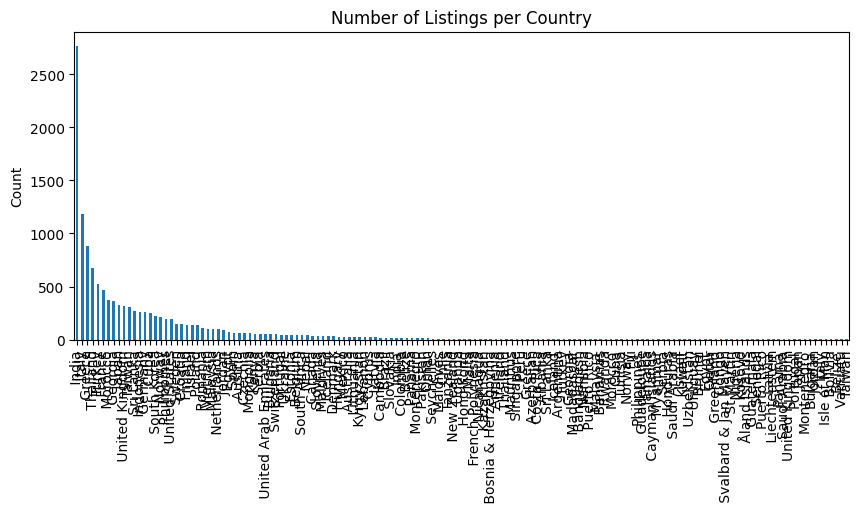

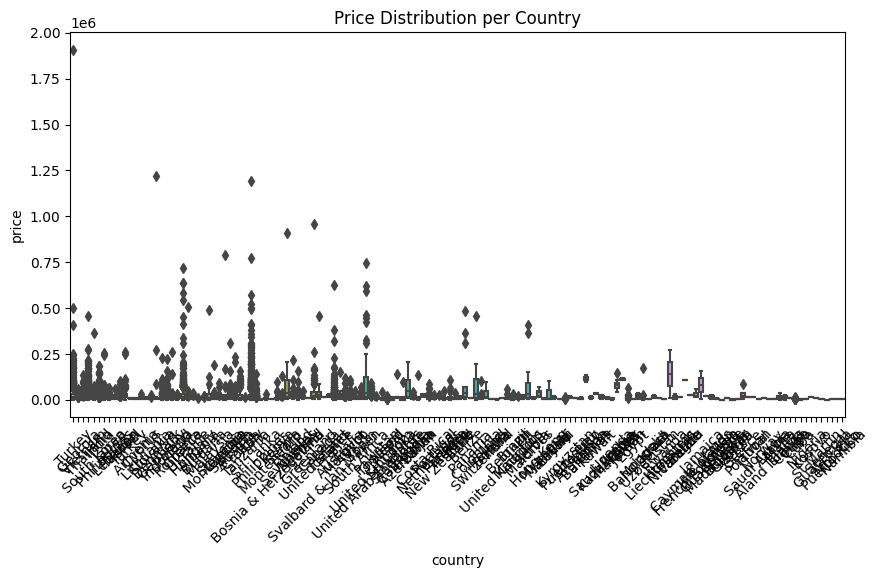

In [41]:
# Country-wise listing distribution
plt.figure(figsize=(10, 4))
df['country'].value_counts().plot(kind='bar')
plt.title('Number of Listings per Country')
plt.ylabel('Count')
plt.show()

# Boxplot of Price vs Country
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='country', y='price')
plt.title('Price Distribution per Country')
plt.xticks(rotation=45)
plt.show()

# *Step 2: Data Cleaning* # 

## Section 2.1: Handle Missing Values ##

In [42]:
from sklearn.impute import SimpleImputer

# Impute numerical columns with median
num_cols = ['rating', 'reviews']
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute categorical columns with mode
cat_cols = ['host_name', 'checkin', 'checkout']
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

## Section 2.2: Outlier Detection and Removal ##

In [43]:
# Remove price outliers using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

## Section 2.3: Encode Categorical Features ##

In [44]:
# One-hot encoding for 'country'
df = pd.get_dummies(df, columns=['country'], drop_first=True)

## Section 2.4: Feature Scaling ##

In [45]:
from sklearn.preprocessing import StandardScaler

# Features to scale
scale_cols = ['rating', 'reviews', 'bedrooms', 'bathrooms', 'guests', 'beds']
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# *Step 3: ANN Model Creation* #

## Section 3.1: Prepare Data for Modeling ##

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price', 'name', 'host_name', 'address', 'features', 'amenities', 'safety_rules', 'hourse_rules', 'checkin', 'checkout'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Section 3.2: Define and Compile ANN Model ##

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

## Section 3.3: Train the Model ##

In [48]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
231/231 [==============================] - 1s 2ms/step - loss: 139197616.0000 - val_loss: 120930008.0000
Epoch 2/100
231/231 [==============================] - 0s 1ms/step - loss: 105854856.0000 - val_loss: 73597448.0000
Epoch 3/100
231/231 [==============================] - 0s 1ms/step - loss: 66423996.0000 - val_loss: 55634260.0000
Epoch 4/100
231/231 [==============================] - 0s 1ms/step - loss: 55343364.0000 - val_loss: 49769740.0000
Epoch 5/100
231/231 [==============================] - 0s 1ms/step - loss: 50113320.0000 - val_loss: 45150524.0000
Epoch 6/100
231/231 [==============================] - 0s 1ms/step - loss: 46328460.0000 - val_loss: 41651776.0000
Epoch 7/100
231/231 [==============================] - 0s 1ms/step - loss: 43201208.0000 - val_loss: 39236004.0000
Epoch 8/100
231/231 [==============================] - 0s 1ms/step - loss: 41301052.0000 - val_loss: 37877216.0000
Epoch 9/100
231/231 [==============================] - 0s 1ms/step - loss: 39

## Section 3.4: Evaluate the Model ##

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test R² Score: {r2:.4f}")

73/73 [==============================] - 0s 645us/step
Test MSE: 35204568.26
Test R² Score: 0.3770


# *Step 4: Accuracy Improvement* #

## Section 4.1: K-Fold Cross Validation with ANN ##

In [50]:
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

# ANN builder function
def build_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

estimator = KerasRegressor(build_fn=build_model, epochs=100, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(estimator, X, y, cv=kfold, scoring='r2')

print(f"Cross-validated R² Scores: {results}")
print(f"Mean R²: {results.mean():.4f}, Std: {results.std():.4f}")

C:\Users\Wasif\AppData\Local\Temp\ipykernel_17512\1560911078.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=build_model, epochs=100, batch_size=32, verbose=0)


Cross-validated R² Scores: [0.38908366 0.36624581 0.40210083 0.36130781 0.39701515]
Mean R²: 0.3832, Std: 0.0164


## Section 4.2: Hyperparameter Tuning (Grid Search) ##

In [51]:
from sklearn.model_selection import GridSearchCV

# Define model wrapper
def build_model_grid(optimizer='adam'):
    model = Sequential()
    model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

model_grid = KerasRegressor(build_fn=build_model_grid, verbose=0)
param_grid = {
    'batch_size': [16, 32],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop']
}

grid = GridSearchCV(estimator=model_grid, param_grid=param_grid, scoring='r2', cv=3)
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\Wasif\AppData\Local\Temp\ipykernel_17512\1776246679.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_grid = KerasRegressor(build_fn=build_model_grid, verbose=0)


Best: 0.293752 using {'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'}


## Section 4.3: Ensemble Comparison (Random Forest) ##

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")

Random Forest MSE: 34859979.01
Random Forest R² Score: 0.3831


## Section 4.4: Compare ANN vs Random Forest ##

In [53]:
print("\nModel Comparison:")
print(f"ANN R² Score: {r2:.4f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")


Model Comparison:
ANN R² Score: 0.3770
Random Forest R² Score: 0.3831


# *Step 5: Advanced Accuracy Optimization* #

## Section 5.1: Feature Engineering (Total Rooms and Room Density) ##

In [54]:
# Add engineered features
X['total_rooms'] = df['bedrooms'] + df['bathrooms'] + df['guests'] + df['beds']
X['room_density'] = df['guests'] / (df['bedrooms'] + 0.1)

## Section 5.2: Re-train ANN with Engineered Features  ##

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0005))

history = model.fit(X_train, y_train, validation_split=0.15, epochs=120, batch_size=16, verbose=1)

Epoch 1/120
491/491 [==============================] - 1s 2ms/step - loss: 97728160.0000 - val_loss: 67445256.0000
Epoch 2/120
491/491 [==============================] - 1s 1ms/step - loss: 57298476.0000 - val_loss: 48093252.0000
Epoch 3/120
491/491 [==============================] - 1s 1ms/step - loss: 45381200.0000 - val_loss: 40071708.0000
Epoch 4/120
491/491 [==============================] - 1s 1ms/step - loss: 40849096.0000 - val_loss: 37931404.0000
Epoch 5/120
491/491 [==============================] - 1s 1ms/step - loss: 39124348.0000 - val_loss: 36917832.0000
Epoch 6/120
491/491 [==============================] - 1s 1ms/step - loss: 38508656.0000 - val_loss: 36184696.0000
Epoch 7/120
491/491 [==============================] - 1s 1ms/step - loss: 37868708.0000 - val_loss: 35877244.0000
Epoch 8/120
491/491 [==============================] - 1s 1ms/step - loss: 37036656.0000 - val_loss: 35965228.0000
Epoch 9/120
491/491 [==============================] - 1s 1ms/step - loss: 37291

## Section 5.3: Evaluation of Enhanced ANN Model ##

In [56]:
y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Enhanced ANN MSE: {mse:.2f}")
print(f"Enhanced ANN R² Score: {r2:.4f}")

73/73 [==============================] - 0s 731us/step
Enhanced ANN MSE: 34005039.70
Enhanced ANN R² Score: 0.3982


## Section 5.4: Gradient Boosting Regressor Comparison ##   

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

print(f"Gradient Boosting MSE: {gb_mse:.2f}")
print(f"Gradient Boosting R² Score: {gb_r2:.4f}")

Gradient Boosting MSE: 33070591.85
Gradient Boosting R² Score: 0.4147


## Section 5.5: Final Model Comparison Summary ##

In [58]:
print("\nFinal Model Comparison:")
print(f"ANN with Feature Eng. R² Score: {r2:.4f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")
print(f"Gradient Boosting R² Score: {gb_r2:.4f}")


Final Model Comparison:
ANN with Feature Eng. R² Score: 0.3982
Random Forest R² Score: 0.3831
Gradient Boosting R² Score: 0.4147


In [59]:
# Save trained model
model.save(r"E:\Wasif_Projects\JoinVentureAI_Task\AirBnB_Prediction_Listings\models\airbnb_enhanced_ann_model.h5")
